## Project 1: Predicting stroke with Naive Bayes and K-NN
-----
###### Student Name(s): Avi Patel


# Naive Bayes Implementation

In [262]:
# import packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import sklearn
import math
import sklearn.model_selection

In [263]:
# load the stroke_update.csv file in dataframe
def load_data():
    df = pd.read_csv("stroke_update.csv")
    return df

In [264]:
# transform data into a usable format 
def preprocess(df):
    # transform numeric to categorical using bin
    df["bmi"] = pd.cut(df["bmi"],bins = 3, labels = ["Low","Normal","High"])
    df["avg_glucose_level"] = pd.cut(df["avg_glucose_level"],bins = 3, labels = ["Low","Normal","High"])
    df["age"] = pd.cut(df["age"],bins = 3, labels = ["Young","Adult","Old"])
    return df

In [265]:
# split a data set into a training set and hold-out test set (default partition 75% and 25%)
def split_data(df):
    train, test = sklearn.model_selection.train_test_split(df,random_state=42, shuffle=True)
    return train, test

In [266]:
# split dataframe into features and class
def split_data_into_label_features(df):
    features = df.iloc[:,0:10].values.tolist()
    label = df["stroke"].values.tolist()
    return features, label

In [267]:
# count the total stroke and no-stroke instances 
def priors_count(label):
    priors = [0]*len(set(label))
    for i in label:
        priors[i] += 1
    return priors

In [268]:
# a supervised Naive Bayes model
def train(features,label):
    prob = {0:{},1:{}}
    for i in range(len(features[0])): # initialize dictionary with 1 (Laplace smoothing)
        prob[0][i]={}
        prob[1][i]={}
        rng = set([j[i] for j in features])
        prob[0][i]={k:1 for k in rng}
        prob[1][i]={k:1 for k in rng}
        
    for i in range(len(features)):    # count of likelihoods
        for j in range(len(features[i])):
            prob[label[i]][j][features[i][j]] += 1

    for i in prob.keys():    # probabilities for estimation
        for j in prob[i].keys():
            count = priors_count(label)[i]
            M = len(prob[i][j])
            for k in prob[i][j]:
                prob[i][j][k] = prob[i][j][k]/(M+count) # Laplace Smoothing
    
    return prob

In [269]:
# Predict the class for an instance or a set of instances, based on a trained model 
def predict(features, priors_count, prob): 
    final_result = []
    for feature in features:
        mid_result = []
        for i in range(len(priors_count)):
            flag=priors_count[i]/sum(priors_count)
            for j in range(len(feature)):
                if feature[j] in prob[i][j]:
                    flag *=  prob[i][j][feature[j]]
            mid_result.append(flag)
        max = np.argmax(mid_result)
        final_result.append(max) 
    return final_result

In [270]:
# Evaluation of a set of predictions in terms of metrics
from sklearn import metrics
def evaluate(label,pred):
    CM = metrics.confusion_matrix(label, pred) # Confusion Matrix
    cr=metrics.classification_report(label, pred, labels=[0, 1])
    return CM, cr

In [271]:
# predict the most common class
def zero_R_Baseline(label):
    count = priors_count(label)
    pred = [np.argmax(count)]*len(label)
    return pred

In [273]:
# implementation of Naive Bayes 
df = load_data()
df = preprocess(df)
train_data, test_data = split_data(df)
train_features, train_label = split_data_into_label_features(train_data)
test_features, test_label = split_data_into_label_features(test_data)
pc = priors_count(train_label)
pxc = train(train_features,train_label)
pred = predict(test_features,pc,pxc)
cm_test,cr_test = evaluate(test_label,pred)

pred = zero_R_Baseline(test_label)
cm_z,cr_z = evaluate(test_label,pred)


print("\nevaluation of Zero R Baseline: \n")
print("Confusion Matrix:")
print(cm_z)
print(cr_z)

print("\nevaluation of Testing Data using Naive Bayes : \n")
print("Confusion Matrix:")
print(cm_test)
print(cr_test)



evaluation of Zero R Baseline: 

Confusion Matrix:
[[560   0]
 [125   0]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       560
           1       0.00      0.00      0.00       125

    accuracy                           0.82       685
   macro avg       0.41      0.50      0.45       685
weighted avg       0.67      0.82      0.74       685


evaluation of Testing Data using Naive Bayes : 

Confusion Matrix:
[[483  77]
 [ 69  56]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       560
           1       0.42      0.45      0.43       125

    accuracy                           0.79       685
   macro avg       0.65      0.66      0.65       685
weighted avg       0.79      0.79      0.79       685



### Question 1: Data exploration

- a) Explore the data and summarise different aspects of the data. Can you see any interesting characteristic in features, classes or categories? What is the main issue with the data? Considering the issue, how would the Naive Bayes classifier work on this data? Discuss your answer based on the Naive Bayes' formulation.
- b) Is accuracy an appropriate metric to evaluate the models created for this data? Justify your answer. Explain which metric(s) would be more appropriate, and contrast their utility against accuracy. [no programming required]



###### Answer 1(a):

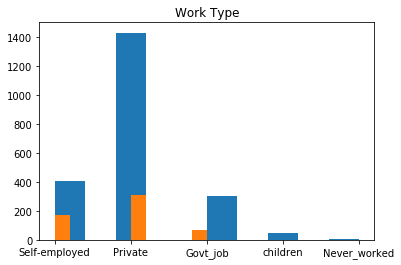

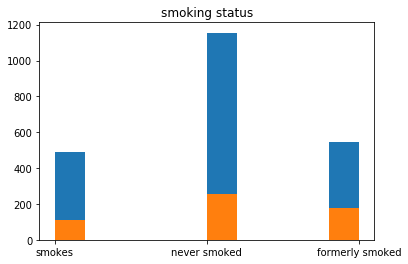

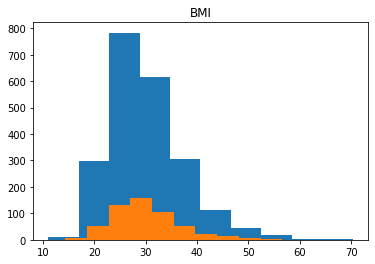

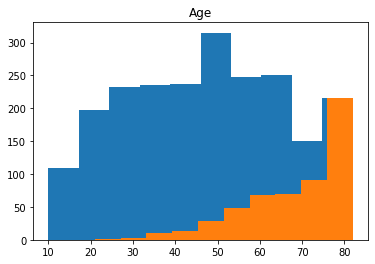

In [274]:
# check feature distribution using histogram
df = load_data()

smoking = df["smoking_status"]
work_type = df["work_type"]
stroke = df["stroke"]
bmi = df["bmi"]
age = df["age"]
array = priors_count(stroke)

# blue = no stroke
# orange = having stroke

# work type histogram
work_type_0 =  work_type[0:array[0]]
work_type_1 = work_type[array[0]:array[0]+array[1]] 
plt.title("Work Type")
plt.hist(np.array(work_type_0))
plt.hist(np.array(work_type_1))
plt.show()

# smoking status histogram
smoking_0 =  smoking[0:array[0]]
smoking_1 = smoking[array[0]:array[0]+array[1]]
plt.title("smoking status")
plt.hist(np.array(smoking_0))
plt.hist(np.array(smoking_1))
plt.show()

# BMI histogram
bmi_0 =  bmi[0:array[0]]
bmi_1 = bmi[array[0]:array[0]+array[1]]
plt.title("BMI")
plt.hist(np.array(bmi_0))
plt.hist(np.array(bmi_1))
plt.show()

# Age histogram
age_0 =  age[0:array[0]]
age_1 = age[array[0]:array[0]+array[1]]
plt.title("Age")
plt.hist(np.array(age_0))
plt.hist(np.array(age_1))
plt.show()

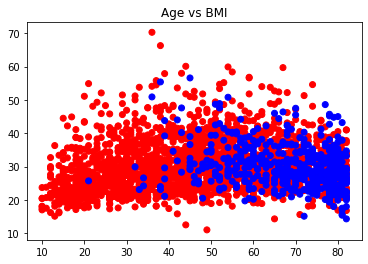

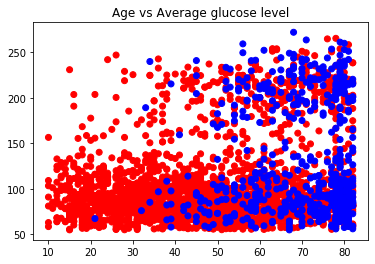

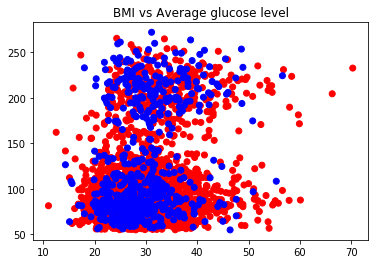

In [275]:
# check numerical data distribution using scatter plot
age = df["age"]
bmi = df["bmi"]
agl = df["avg_glucose_level"]
stroke = df["stroke"]
array = priors_count(s)

# red = no stroke class
# blue = having stroke class
colours = array[0]*["red"]+array[1]*["blue"]

# Age vs BMI scatter plot
plt.title("Age vs BMI")
plt.scatter(np.array(age),np.array(bmi),c=colours)
plt.show()

# Age vs Average glucose level scatter plot
plt.title("Age vs Average glucose level")
plt.scatter(np.array(age),np.array(agl),c=colours)
plt.show()

# BMI vs Average glucose level scatter plot 
plt.title("BMI vs Average glucose level")
plt.scatter(np.array(bmi),np.array(agl),c=colours)
plt.show()

    Mainly stroke dataset contains a combination of categorical and numerical data. After analyzing different histograms and scatter plots, I came to different conclusions. First four histograms we can see that there private and the self employed worker has more risk of having a stroke than a government worker. People with age more than 50 have a high chance of stroke. As in naive Bayes classification we assume every data is normally distributed still age feature does not have normally distributed data. 
    Talking about scatter plot data, predictive stroke is higher if age is greater than 50 and BMI between 20 and 50. BMI and Average glucose level have an equal number of the cluster for stroke and no stroke class.
    The main issue of this data is a large number of instances are in no stroke class as compare to having stroke class. That can make the accuracy of the model high but the usability of the model less reliable. There could be a very high chance for True negative and False positive that could predict a false value for having a stroke.

##### Answer 1(b):
    It is not fair to completely rely on accuracy for evaluation. There are other measures like confusion matrix, precision, recall, F1 scores. An unambiguous and clean way to predict the result is through a confusion matrix. 
    Evaluating stroke data through accuracy is not a good option because of the accuracy paradox. In the above code result, we can see that there is an imbalance between positive and negative classes. Accuracy mainly deals with true prediction. As no stroke class has more instances the result of accuracy would be biased. Precision and recall for individual classes provide a better understanding of evaluation as they describe the higher value for no-stroke and less value for prediction of stroke as per the instances.

### Question 2: Naive Bayes concepts and formulation

- a) Explain the independence assumption underlying Naive Bayes. What are the advantages and disadvantages of this assumption? Elaborate your answers using the features of the provided data. [no programming required]
- b) Implement the Naive Bayes classifier. You need to decide how you are going to apply Naive Bayes for nominal and numeric attributes. You can combine both Gaussian and Categorical Naive Bayes (option 1) or just using Categorical Naive Bayes (option 2). Explain your decision. For Categorical Naive Bayes, you can choose either epsilon or Laplace smoothing for this calculation. Evaluate the classifier using accuracy and appropriate metric(s) on test data. Explain your observations on how the classifiers have performed based on the metric(s). Discuss the performance of the classifiers in comparison with the Zero-R baseline.
- c) Explain the difference between epsilon and Laplace smoothing. [no programming required]

##### Answer 2(a):
    Naive Bayes assumes that instances are independent of each other as well as features of an instance are conditionally independent. Another assumption of Naive Bayes is the distribution of data in trains and tests is similar.
    Based on the Naive Bayes assumption, we can consider every instance (person) is independent of each other as well as the class label (no stroke, having a stroke) is treated as conditionally independent. For example, having a stroke and no stroke slightly depends on age, heart_diseas, etc. features but in Naive Bayes, we consider these completely independent and make a prediction using that assumption.
    Because of this assumption, Naive bayes performs better compared to other models. On the opposite side, in real life, it is almost impossible to find a set of predictors that are completely independent.

##### Answer 2(b):
    Naive Bayes has been implemented at the starting of the assignment. A dataset contains both nominal and numeric data,     complete dataset has been converted to categorical data by dividing the numerical fields into appropriate beans.
    I have chosen categorical naive Bayes. Gaussian naive Bayes assumes normal distribution for all the numeric features.    But categorical naive Bayes uses multinomial distribution for all pairs and we need to count distinct categories, That  is the reason I have chosen categorical naive Bayes.
    I have applied Laplace smoothing to avoid the zero-frequency problem an avoid tie between two events. Based on the      result after evaluation, the classifier has provided 79% accuracy. Because of the large frequency of no-stroke class    instances, the precision and recall of that class are higher than the stroke class. Zero R baseline is decided by       predicting all the value as the maximum instance class(no stroke). Zero R baseline accuracy is nearer to the actual test accuracy so the prediction model is good.

##### Answer 2(c):
    Epsilon smoothing:
        Only unseen events are replaced with very small non zero number(epsilon) where the value of epsilon is less than 1/number of instances. Comparison between two events is done by counting the number of epsilons. Event with a small number of epsilons wins. There could be a problem with a tie.
    Laplace Smoothing: 
        All the events counts are increased with the same value(alpha) to maintain monotonicity. The count of the unique value of class categories is added to the denominator to minimize the difference with zero. This method can overestimate     the likelihood of unseen events.
            


### Question 3: Model Comparison
- a) Implement the K-NN classifier, and find the optimal value for K. 
- b) Based on the obtained value for K in question 4 (a), evaluate the classifier using accuracy and chosen metric(s) on test data. Explain your observations on how the classifiers have performed based on the metric(s). Discuss the performance of the classifiers in comparison with the Zero-R baseline.
- c) Compare the classifiers (Naive Bayes and K-NN) based on metrics' results. Provide a comparatory discussion on the results. [no programming required]

##### Answer 3(a):    

In [276]:
# K-NN Classifier
import sklearn
from sklearn.neighbors import KNeighborsClassifier

# k-nn classifier using sklearn 
def knn_train(train_features,train_label,k):
    classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    classifier.fit(train_features, train_label)
    return classifier

In [277]:
# predict the class based on trained classifier
def knn_pred(classifier, test_features):
    preds = classifier.predict(test_features)
    return preds

In [278]:
# find the optimum value of k using max accuracy or minimum error rate
def knn_optimum(train_features,train_label,test_features,test_label):
    accuracy = []
    for i in range(1,30):
        classifier = knn_train(train_features,train_label,i)
        pred_i = knn_pred(classifier, test_features)
        accuracy.append(metrics.accuracy_score(test_label, pred_i))
    print("Max accuracy:-",max(accuracy),"at K =",accuracy.index(max(accuracy))+1)
    return accuracy.index(max(accuracy))+1

In [279]:
# K-NN implementation
df = load_data()
df = pd.get_dummies(df, drop_first=True)
train_data, test_data = split_data(df)
train_features, train_label = split_data_into_label_features(train_data)
test_features, test_label = split_data_into_label_features(test_data)
optimum_k = knn_optimum(train_features,train_label,test_features,test_label)

Max accuracy:- 0.8189781021897811 at K = 10


    The above code is the implementation of the KNN classifier and finding the optimal value of K. After iterating from 1 to 30(random number), the value of K is optimum at 10 with the highest accuracy of 82%. 
    KNeighborsClassifier method of sklearn library is used to calculate the KNN classifier. The distance between instances    is selected as euclidean. As this is the simplest distance between two points as a straight line. In an iterative loop,  prediction for each k is made, and based on the highest prediction accuracy of K the optimum k is assigned.

##### Answer 3(b):

In [281]:
# evaluation of the classifier using optimum value of k
classifier = knn_train(train_features, train_label,optimum_k)
pred = knn_pred(classifier, test_features)
cm_test,cr_test = evaluate(test_label,pred)

pred = zero_R_Baseline(test_label)
cm_z,cr_z = evaluate(test_label,pred)


print("\nevaluation of Zero R Baseline: \n")
print("Confusion Matrix:")
print(cm_z)
print(cr_z)

print("\nevaluation of Testing Data using KNN : \n")
print("Confusion Matrix:")
print(cm_test)
print(cr_test)




evaluation of Zero R Baseline: 

Confusion Matrix:
[[560   0]
 [125   0]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       560
           1       0.00      0.00      0.00       125

    accuracy                           0.82       685
   macro avg       0.41      0.50      0.45       685
weighted avg       0.67      0.82      0.74       685


evaluation of Testing Data using KNN : 

Confusion Matrix:
[[524  36]
 [ 88  37]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.89       560
           1       0.51      0.30      0.37       125

    accuracy                           0.82       685
   macro avg       0.68      0.62      0.63       685
weighted avg       0.79      0.82      0.80       685



C:\Users\avipa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


    Above is the code for evaluation of K-NN classifier using optimized K. We have calculated the optimized value of K is 10 using maximum accuracy and minimum error rate in question 3(a).
    Evaluation of KNN classification provides 82% accuracy on optimized K. From precision and recall for no stroke class, we can conclude that  94% of relevant instances have chosen and 86% instances are relevant from chosen instances. But in       case of having a stroke, the performance is not good as there are only 30% relevant instances has selected.   
    Comparing with the zero baseline, as no stroke class has a higher number of instances the recall value for that is 100%. And the accuracy of the baseline is the same as the accuracy of the KNN classifier. Precision is also increased in the KNN classifier compare to baseline.  

##### Answer 3(c):
    Naive Bayes is an eager learning classifier and faster than KNN which is a supervised lazy learning classifier. Accuracy for KNN is higher than naive Bayes classification as we have used optimized k with a minimum error rate. 
    Here we have used the similarity between the observations to predict the result that is the other reason that KNN provides better results because of the local optimization.
    Comparing the precision and recall, as the accuracy of KNN is high still the number of relevant instances selected is less for having stroke class than Naive Bayes classifier. This can be argued by comparing the recall value of the stroke  class.
    Comparing the precision in no stroke class, naive Bayes provides better precision compare to KNN.   